In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE             ...              \
0   1    20000.0    2          2         1   24             ...               
1   2   120000.0    2          2         2   26             ...               
2   3    90000.0    2          2         2   34             ...               
3   4    50000.0    2          2         1   37             ...               
4   5    50000.0    1          2         1   57             ...               

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     689.0       0.0       0.0       0.0       0.0   
1    1000.0    1000.0    1000.0       0.0    2000.0   
2    1500.0    1000.0    1000.0    1000.0    5000.0   
3    2019.0    1200.0    1100.0    1069.0    1000.0   
4   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [4]:
#30000 rows, 25 columns
print(df.shape)

(30000, 25)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
# rename PAY_0 to PAY_1 and default.payment.next.month to default_payment
df.rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month':'default_payment'}, inplace=True)

In [7]:
df.sample(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE       ...         \
18513  18514    60000.0    2          2         1   24       ...          
16578  16579    30000.0    1          1         2   29       ...          
9746    9747   160000.0    2          2         2   52       ...          
6426    6427   100000.0    2          1         2   24       ...          
26763  26764   180000.0    1          1         2   26       ...          

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment  
18513    1460.0    1439.0    1000.0    1014.0    1078.0                1  
16578    5000.0    1500.0    1200.0    1300.0       0.0                1  
9746     2700.0    2700.0    2700.0    2700.0    2700.0                0  
6426     8440.0       0.0    3873.0    7733.0       0.0                1  
26763    5004.0    3416.0    3074.0    3500.0    3179.0                0  

[5 rows x 25 columns]

# Categorical Values

In [8]:
cat = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6', 'default_payment']
df[cat].describe()

SEX     EDUCATION      MARRIAGE         PAY_1         PAY_2  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       1.603733      1.853133      1.551867     -0.016700     -0.133767   
std        0.489129      0.790349      0.521970      1.123802      1.197186   
min        1.000000      0.000000      0.000000     -2.000000     -2.000000   
25%        1.000000      1.000000      1.000000     -1.000000     -1.000000   
50%        2.000000      2.000000      2.000000      0.000000      0.000000   
75%        2.000000      2.000000      2.000000      0.000000      0.000000   
max        2.000000      6.000000      3.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6  default_payment  
count  30000.000000  30000.000000  30000.000000  30000.000000     30000.000000  
mean      -0.166200     -0.220667     -0.266200     -0.291100         0.221200  
std        1.196868      1.169139      1.133187      1.149988         0.415062  
min       -2.000000     -2.000000     -2.000000     -2.000000         0.000000  
25%       -1.000000     -1.000000     -1.000000     -1.000000         0.000000  
50%        0.000000      0.000000      0.000000      0.000000         0.000000  
75%        0.000000      0.000000      0.000000      0.000000         0.000000  
max        8.000000      8.000000      8.000000      8.000000         1.000000

### Finding null value and unique values for each feature

In [9]:
for cat_value in cat:
    print('{0} -> isnull: {1}, unique values: {2}'.format(cat_value, df[cat_value].isnull().values.any(), sorted(df[cat_value].unique())))

SEX -> isnull: False, unique values: [1, 2]
EDUCATION -> isnull: False, unique values: [0, 1, 2, 3, 4, 5, 6]
MARRIAGE -> isnull: False, unique values: [0, 1, 2, 3]
PAY_1 -> isnull: False, unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 -> isnull: False, unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 -> isnull: False, unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 -> isnull: False, unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 -> isnull: False, unique values: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 -> isnull: False, unique values: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
default_payment -> isnull: False, unique values: [0, 1]


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

for idx, feat in enumerate(['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment']): 
    ax = axes[int(idx / 2), idx % 2] 
    sns.countplot(x=feat, data=df, ax=ax, palette="summer"); 
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();

In [ ]:
# according to data description, Education should be only 1, 2, 3, 4
# marriage should be 1, 2, 3
df['EDUCATION'] = df['EDUCATION'].map({0:4, 1:1, 2:2, 3:3, 4:4, 5:4, 6:4})
#df['MARRIAGE'] = df['MARRIAGE'].map({0:3, 1:1, 2:2, 3:3})

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

for idx, feat in enumerate(['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment']): 
    ax = axes[int(idx / 2), idx % 2] 
    sns.countplot(x=feat, data=df, ax=ax, palette="summer"); 
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();

In [231]:
sex_option = {'1' : 'Male', '2' : 'Female'}
education_option = {'0' : 'Graduate school', '1' : 'University', '2' : 'High school', '3' : 'Others'}
marriage_option = {'0' : 'Others', '1' : 'Married', '2' : 'Single', '3' : 'Divorce'}
pay_option = {'-2' : 'No consumption', '-1' : 'Duly pay', '0' : 'Pay', '1' : 'Delay 1', 
              '2' : 'Delay 2', '3' : 'Delay 3', '4' : 'Delay 4', '5' : 'Delay 5', 
              '6' : 'Delay 6', '7' : 'Delay 7', '8' : 'Delay 8'}
default_payment_option = {'0' : 'No', '1' : 'Yes'}

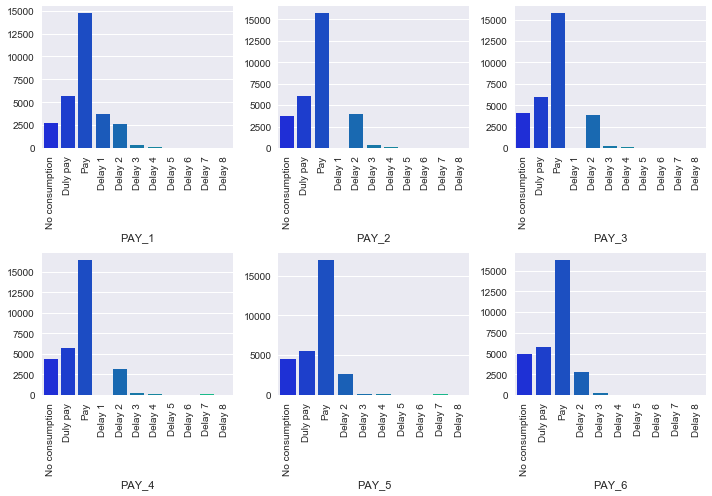

In [233]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for idx, feat in enumerate(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']): 
    ax = axes[int(idx / 3), idx % 3] 
    g = sns.countplot(x=feat, data=df, ax=ax, palette="winter"); 
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
    ax.set_xticklabels([ pay_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], 
                       rotation='vertical', fontsize=10)

fig.tight_layout();





In [11]:
# pay_5 and pay_6 don't contain value 1

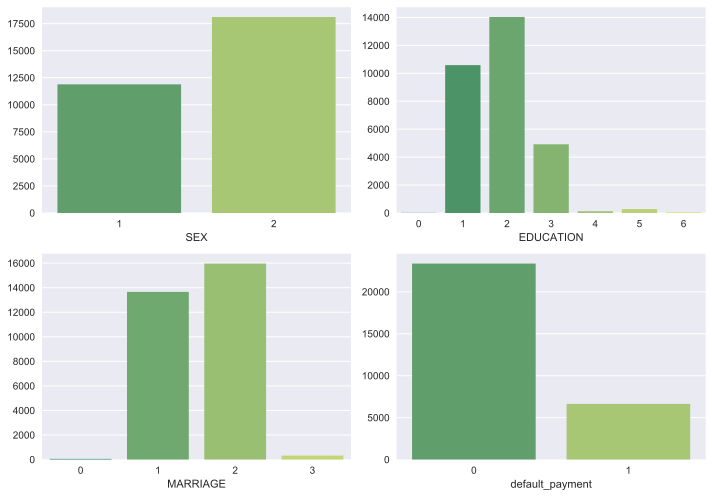

In [12]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# for idx, feat in enumerate(['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment']): 
#     ax = axes[int(idx / 2), idx % 2] 
#     sns.countplot(x=feat, data=df, ax=ax, palette="summer"); 
#     ax.set_xlabel(feat) 
#     ax.set_ylabel('') 
# fig.tight_layout();

In [13]:
# according to data description, Education should be only 1, 2, 3, 4
# marriage should be 1, 2, 3

In [14]:
#df['EDUCATION'] = df['EDUCATION'].map({0:4, 1:1, 2:2, 3:3, 4:4, 5:4, 6:4})
#df['MARRIAGE'] = df['MARRIAGE'].map({0:3, 1:1, 2:2, 3:3})

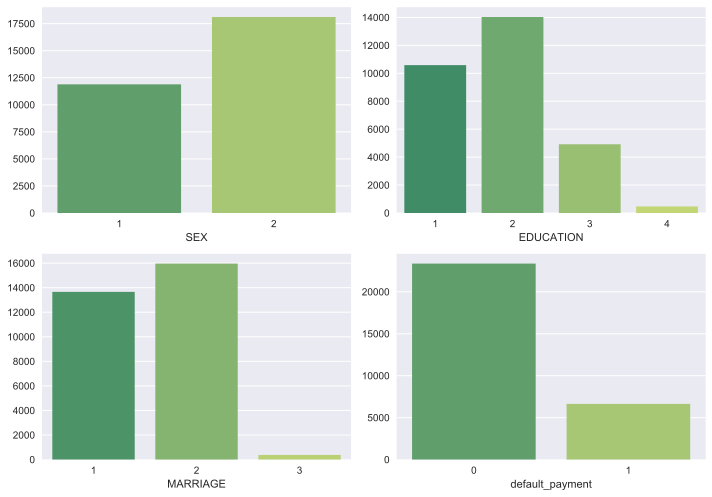

In [15]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# for idx, feat in enumerate(['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment']): 
#     ax = axes[int(idx / 2), idx % 2] 
#     sns.countplot(x=feat, data=df, ax=ax, palette="summer"); 
#     ax.set_xlabel(feat) 
#     ax.set_ylabel('') 
# fig.tight_layout();

# Numerical Values

In [16]:
num = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[num].describe()

LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      ...             PAY_AMT1  \
count  3.000000e+04   30000.000000      ...         30000.000000   
mean   4.701315e+04   43262.948967      ...          5663.580500   
std    6.934939e+04   64332.856134      ...         16563.280354   
min   -1.572640e+05 -170000.000000      ...             0.000000   
25%    2.666250e+03    2326.750000      ...          1000.000000   
50%    2.008850e+04   19052.000000      ...          2100.000000   
75%    6.016475e+04   54506.000000      ...          5006.000000   
max    1.664089e+06  891586.000000      ...        873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5       PAY_AMT6  
count  3.000000e+04   30000.00000   30000.000000   30000.000000   30000.000000  
mean   5.921163e+03    5225.68150    4826.076867    4799.387633    5215.502567  
std    2.304087e+04   17606.96147   15666.159744   15278.305679   17777.465775  
min    0.000000e+00       0.00000       0.000000       0.000000       0.000000  
25%    8.330000e+02     390.00000     296.000000     252.500000     117.750000  
50%    2.009000e+03    1800.00000    1500.000000    1500.000000    1500.000000  
75%    5.000000e+03    4505.00000    4013.250000    4031.500000    4000.000000  
max    1.684259e+06  896040.00000  621000.000000  426529.000000  528666.000000  

[8 rows x 14 columns]

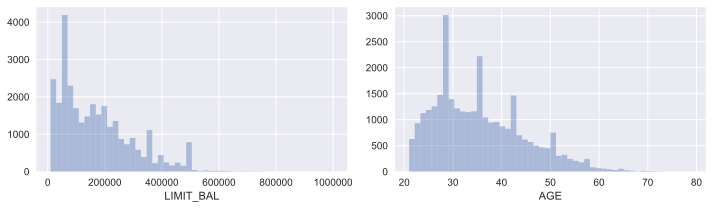

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

for idx, feat in enumerate(['LIMIT_BAL', 'AGE']): 
    ax = axes[idx] 
    sns.distplot(df[feat], kde=False, ax=ax);
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();



In [18]:
# LIMIT balance contains outlier 

In [19]:
outlier_LITMIT_BAL = df['LIMIT_BAL'].mean() + 3 * df['LIMIT_BAL'].std()
df.LIMIT_BAL[df['LIMIT_BAL'] > outlier_LITMIT_BAL].count()

130

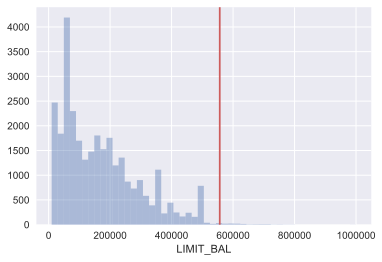

In [20]:
sns.distplot(df.LIMIT_BAL, kde=False);
plt.axvline(x=outlier_LITMIT_BAL, color='indianred')


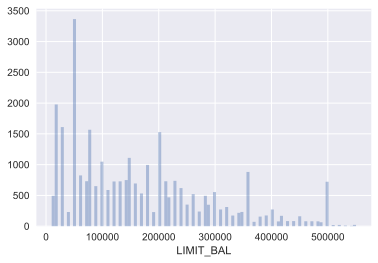

In [21]:
sns.distplot(df.LIMIT_BAL[df['LIMIT_BAL'] < outlier_LITMIT_BAL], kde=False, bins=100);

In [22]:
bins = [12, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Senior', 'Elderly']
df['AGE_group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

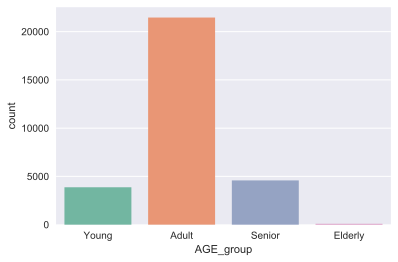

In [23]:
sns.countplot(x='AGE_group', data=df, palette="Set2");

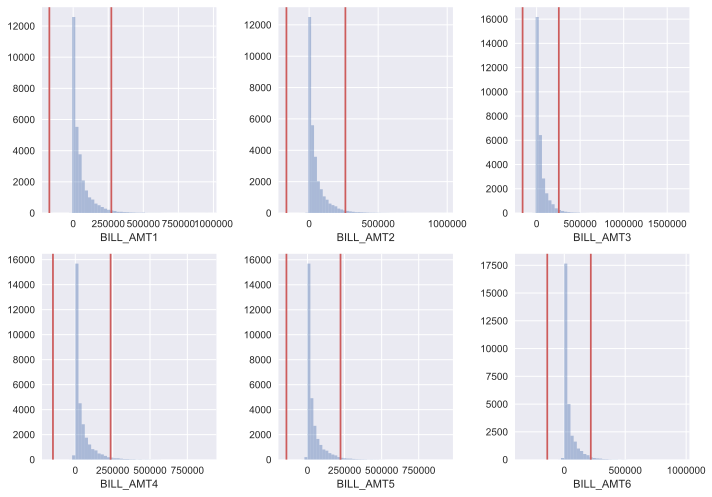

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for idx, feat in enumerate(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']): 
    ax = axes[int(idx / 3), idx % 3]  
    
    min_outlier = df[feat].mean() - 3 * df[feat].std()
    max_outlier = df[feat].mean() + 3 * df[feat].std()
    
    sns.distplot(df[feat], kde=False, ax=ax)
    ax.axvline(x=min_outlier, color='indianred')
    ax.axvline(x=max_outlier, color='indianred')
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();


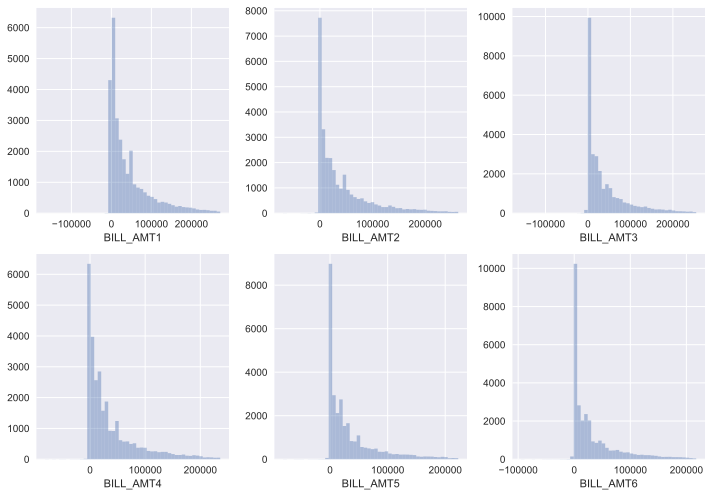

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for idx, feat in enumerate(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']): 
    ax = axes[int(idx / 3), idx % 3]  
    
    min_outlier = df[feat].mean() - 3 * df[feat].std()
    max_outlier = df[feat].mean() + 3 * df[feat].std()
    
    sns.distplot(df[feat][(df[feat] > min_outlier) & (df[feat] < max_outlier)], kde=False, ax=ax)
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();


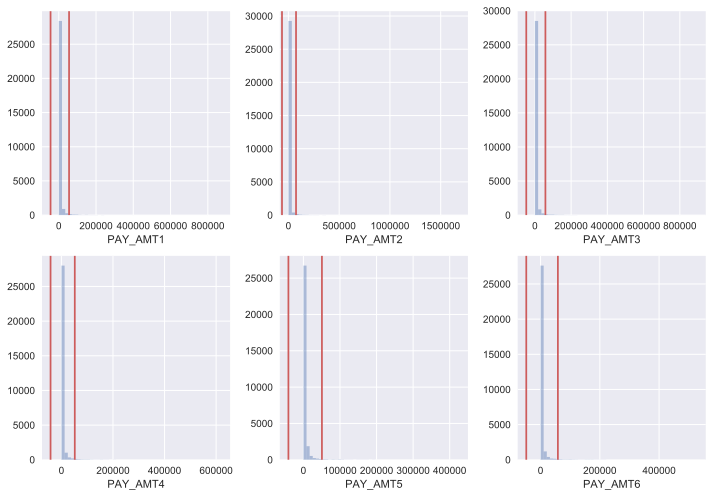

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for idx, feat in enumerate(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']): 
    ax = axes[int(idx / 3), idx % 3]  
    
    min_outlier = df[feat].mean() - 3 * df[feat].std()
    max_outlier = df[feat].mean() + 3 * df[feat].std()
    
    sns.distplot(df[feat], kde=False, ax=ax)
    ax.axvline(x=min_outlier, color='indianred')
    ax.axvline(x=max_outlier, color='indianred')
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();


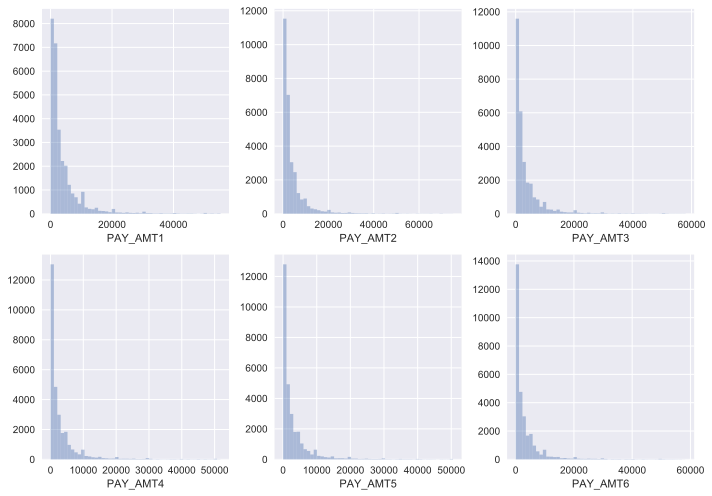

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for idx, feat in enumerate(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']): 
    ax = axes[int(idx / 3), idx % 3]  
    
    min_outlier = df[feat].mean() - 3 * df[feat].std()
    max_outlier = df[feat].mean() + 3 * df[feat].std()
    
    sns.distplot(df[feat][(df[feat] > min_outlier) & (df[feat] < max_outlier)], kde=False, ax=ax)
    ax.set_xlabel(feat) 
    ax.set_ylabel('') 
fig.tight_layout();


In [28]:
# Then I decide to remove the outlier of PAY_AMT1-6, BILL_AMT1-6, LIMIT_BAL
dataset = df[(df['LIMIT_BAL'] < df['LIMIT_BAL'].mean() + 3 * df['LIMIT_BAL'].std()) &
   (df['BILL_AMT1'] < df['BILL_AMT1'].mean() + 3 * df['BILL_AMT1'].std()) &
   (df['BILL_AMT2'] < df['BILL_AMT2'].mean() + 3 * df['BILL_AMT2'].std()) &
   (df['BILL_AMT3'] < df['BILL_AMT3'].mean() + 3 * df['BILL_AMT3'].std()) &
   (df['BILL_AMT4'] < df['BILL_AMT4'].mean() + 3 * df['BILL_AMT4'].std()) &
   (df['BILL_AMT5'] < df['BILL_AMT5'].mean() + 3 * df['BILL_AMT5'].std()) &
   (df['BILL_AMT6'] < df['BILL_AMT6'].mean() + 3 * df['BILL_AMT6'].std()) &
   (df['PAY_AMT1'] < df['PAY_AMT1'].mean() + 3 * df['PAY_AMT1'].std()) &
   (df['PAY_AMT2'] < df['PAY_AMT2'].mean() + 3 * df['PAY_AMT2'].std()) &
   (df['PAY_AMT3'] < df['PAY_AMT3'].mean() + 3 * df['PAY_AMT3'].std()) &
   (df['PAY_AMT4'] < df['PAY_AMT4'].mean() + 3 * df['PAY_AMT4'].std()) &
   (df['PAY_AMT5'] < df['PAY_AMT5'].mean() + 3 * df['PAY_AMT5'].std()) &
   (df['PAY_AMT6'] < df['PAY_AMT6'].mean() + 3 * df['PAY_AMT6'].std())]

In [29]:
dataset.shape

(27199, 26)

Text(0.5,1,'Heatmap of Correlation Matrix')

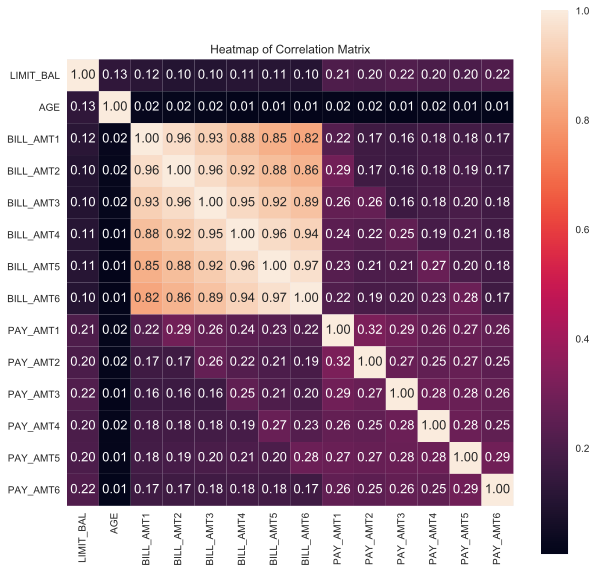

In [30]:
corr=dataset[num].corr()
corr = (corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

# Finding relation between variables with target variable

In [31]:
dataset['default_payment'].mean()

0.22908930475385125

In [46]:
dataset.groupby('default_payment').mean().unstack()
# Limit balance tend to be lower 
# PAY_X
# PAY_AMT

           default_payment
ID         0                   15024.526660
           1                   14769.251966
LIMIT_BAL  0                  162103.777184
           1                  118876.584818
SEX        0                       1.619468
           1                       1.567967
EDUCATION  0                       1.841234
           1                       1.898090
MARRIAGE   0                       1.568295
           1                       1.532659
AGE        0                      35.274466
           1                      35.608249
PAY_1      0                      -0.199161
           1                       0.670518
PAY_2      0                      -0.294401
           1                       0.465415
PAY_3      0                      -0.310330
           1                       0.370406
PAY_4      0                      -0.355589
           1                       0.268336
PAY_5      0                      -0.393266
           1                       0.174129
PAY_6

0    20968
1     6231
Name: default_payment, dtype: int64


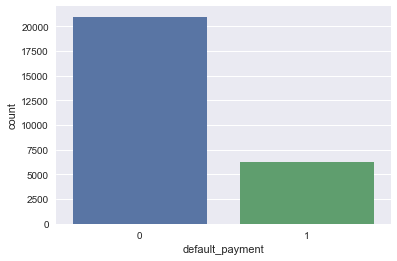

In [42]:
print(dataset['default_payment'].value_counts())
sns.countplot(x='default_payment', data=dataset);

In [34]:
num_with_default = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment']

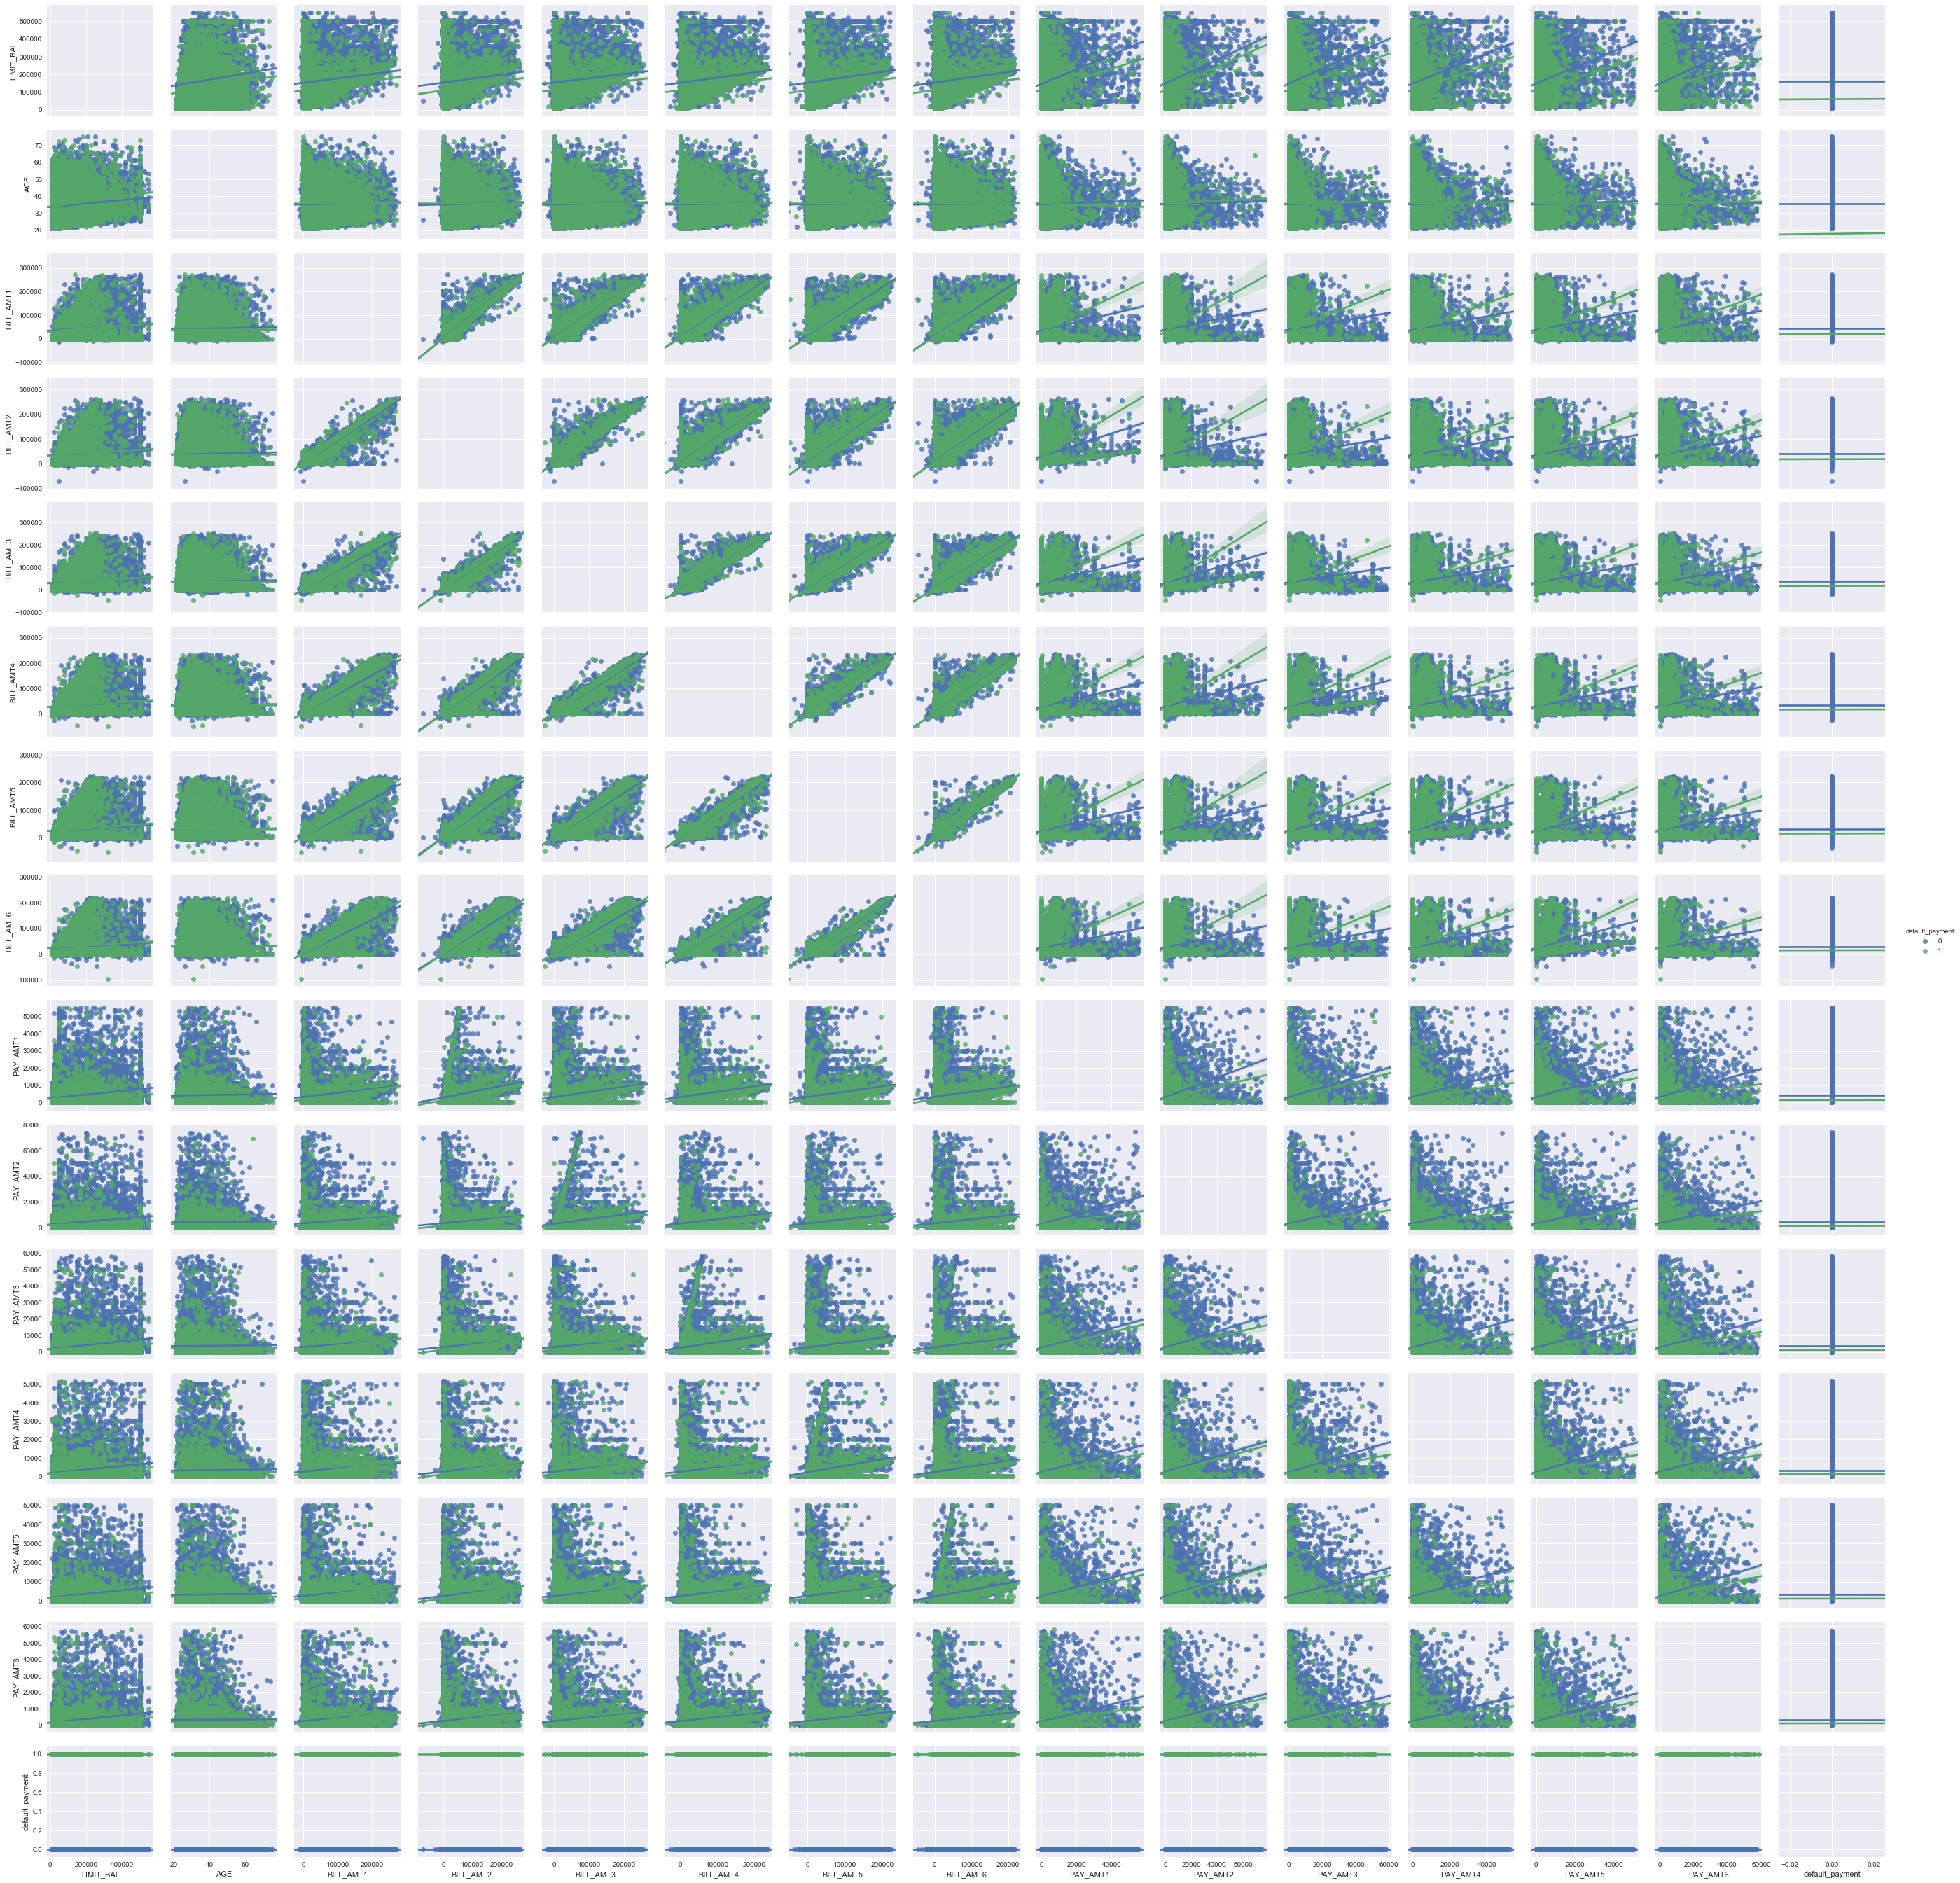

In [35]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(dataset[num_with_default], hue='default_payment', diag_kind="histogram", kind="reg")


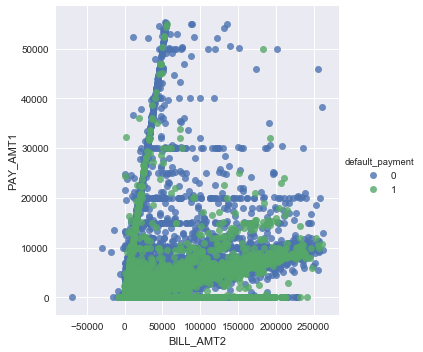

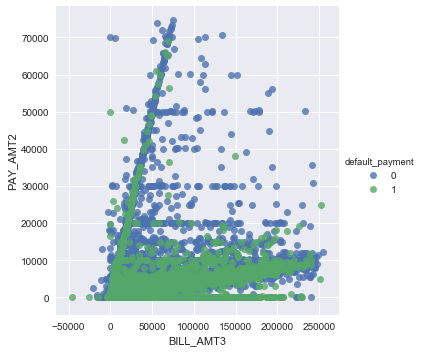

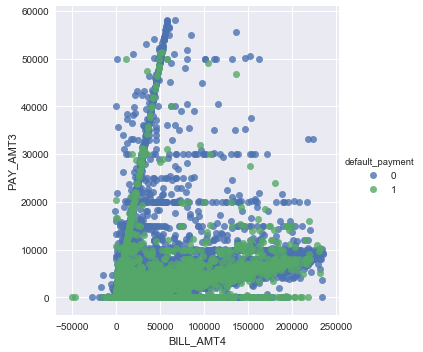

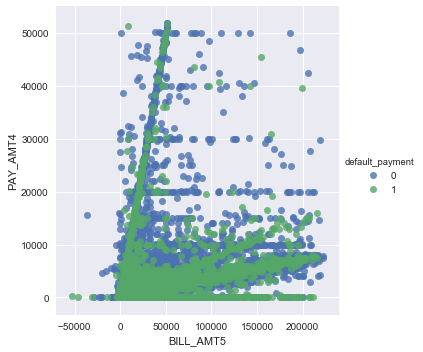

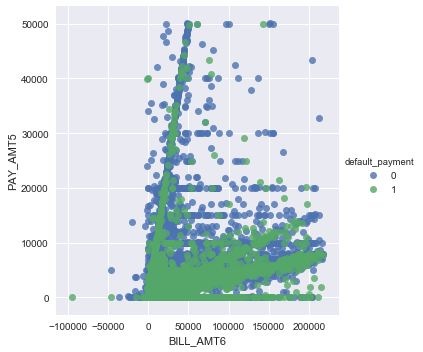

In [43]:
#BILL_AMT ant PAY_AMT by default

#fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
sns.lmplot('BILL_AMT2', 'PAY_AMT1', data=dataset, 
           hue='default_payment', fit_reg=False);
sns.lmplot('BILL_AMT3', 'PAY_AMT2', data=dataset, 
           hue='default_payment', fit_reg=False);
sns.lmplot('BILL_AMT4', 'PAY_AMT3', data=dataset, 
           hue='default_payment', fit_reg=False);
sns.lmplot('BILL_AMT5', 'PAY_AMT4', data=dataset, 
           hue='default_payment', fit_reg=False);
sns.lmplot('BILL_AMT6', 'PAY_AMT5', data=dataset, 
           hue='default_payment', fit_reg=False);

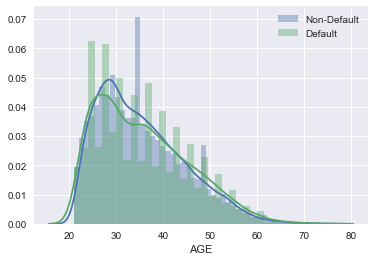

In [44]:
#Age and default
sns.distplot(dataset['AGE'][dataset['default_payment'] == 0], label = 'Non-Default');
sns.distplot(dataset['AGE'][dataset['default_payment'] == 1], label = 'Default');
plt.legend()


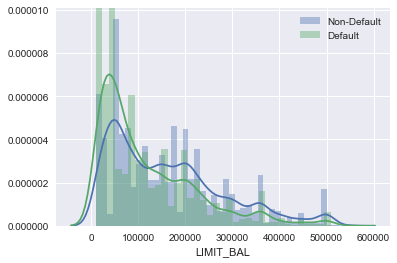

In [45]:
#Limit Balance and default
sns.distplot(dataset['LIMIT_BAL'][dataset['default_payment'] == 0], label = 'Non-Default');
sns.distplot(dataset['LIMIT_BAL'][dataset['default_payment'] == 1], label = 'Default');
plt.legend()


In [59]:
#SEX AGE EDUCATION MARRIAGE with Default

130

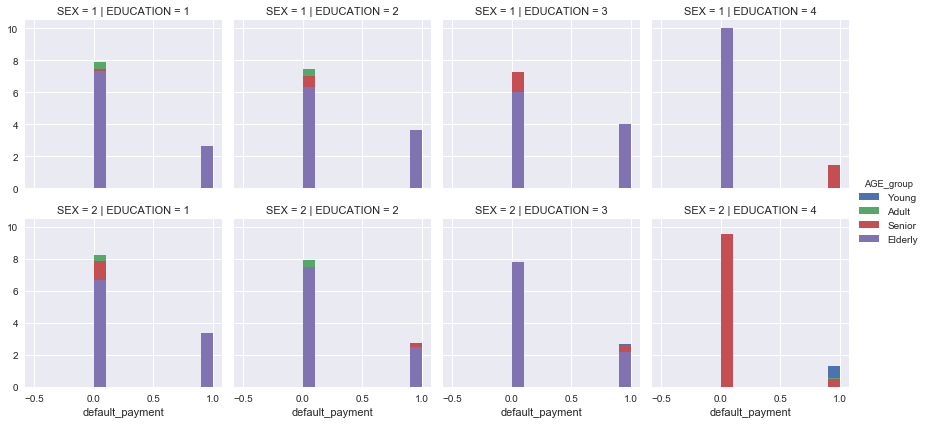

In [162]:
g = sns.FacetGrid(dataset, col='EDUCATION', row='SEX', hue='AGE_group')
g.map(plt.hist, "default_payment", histtype='bar', stacked=True, density=True);
g.add_legend()

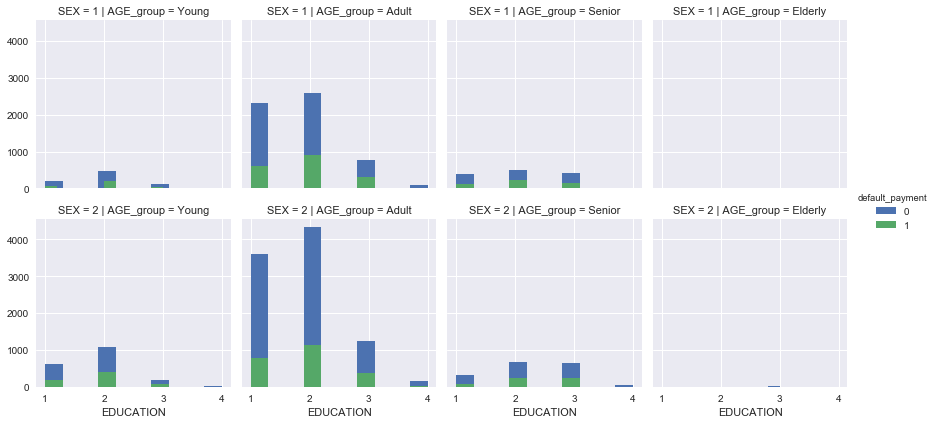

In [144]:
g = sns.FacetGrid(dataset, col='AGE_group', row='SEX', hue='default_payment')
g.map(plt.hist, "EDUCATION");
g.add_legend()

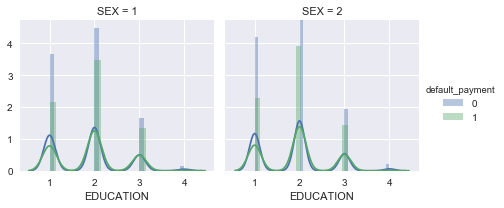

In [92]:
g = sns.FacetGrid(dataset, col='SEX', hue='default_payment')
g.map(sns.distplot, "EDUCATION", hist=True, rug=False);
g.add_legend()

In [ ]:
sns.barplot(x='group', y='Values', data=df, estimator=lambda x: sum(x==0)*100.0/len(x))

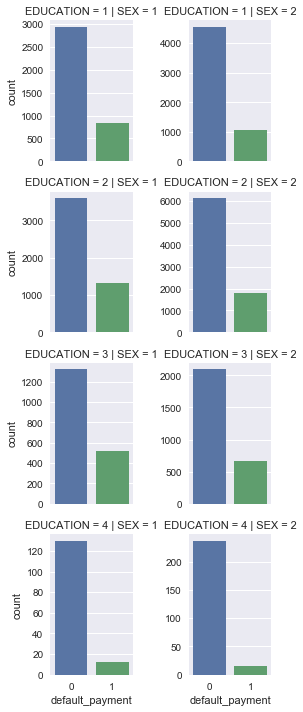

In [107]:
g = sns.factorplot("default_payment", col="SEX", row="EDUCATION",
                    data=dataset,
                    kind="count", size=2.5, aspect=.8, sharey=False)

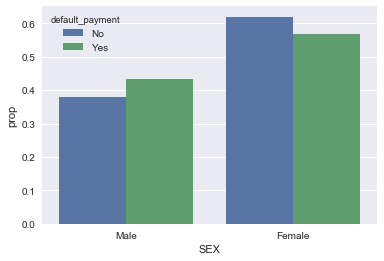

In [229]:
ax = (dataset['SEX']
 .groupby(df['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='SEX', y='prop', hue='default_payment'))

ax.set_xticklabels([ sex_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]], fontsize=10)

test = ax.get_xticklabels()

new_labels = ['No', 'Yes']
for t, l in zip(ax.legend_.texts, new_labels): t.set_text(l)
plt.show()


In [228]:
[ sex_option.get(k) for k in [item.get_text() for item in ax.get_xticklabels()]]

['Male', 'Female']

In [220]:
[item.get_text() for item in ax.get_xticklabels()]

['1', '2']

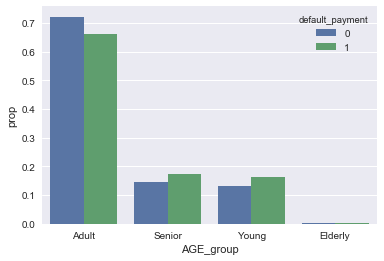

In [166]:
(dataset['AGE_group']
 .groupby(df['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='AGE_group', y='prop', hue='default_payment'))

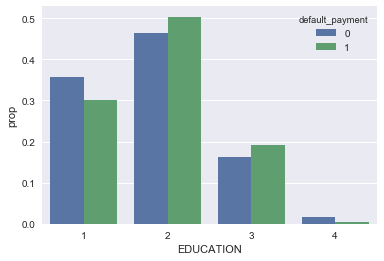

In [167]:
(dataset['EDUCATION']
 .groupby(df['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='EDUCATION', y='prop', hue='default_payment'))

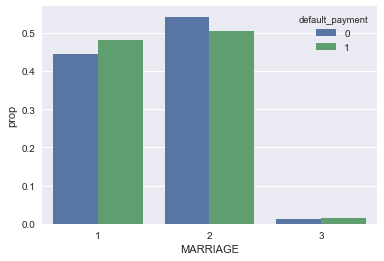

In [168]:
(dataset['MARRIAGE']
 .groupby(df['default_payment'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='MARRIAGE', y='prop', hue='default_payment'))

In [57]:
df[df['LIMIT_BAL'] > df['LIMIT_BAL'].mean() + 3 * df['LIMIT_BAL'].std()].count()

ID                 130
LIMIT_BAL          130
SEX                130
EDUCATION          130
MARRIAGE           130
AGE                130
PAY_1              130
PAY_2              130
PAY_3              130
PAY_4              130
PAY_5              130
PAY_6              130
BILL_AMT1          130
BILL_AMT2          130
BILL_AMT3          130
BILL_AMT4          130
BILL_AMT5          130
BILL_AMT6          130
PAY_AMT1           130
PAY_AMT2           130
PAY_AMT3           130
PAY_AMT4           130
PAY_AMT5           130
PAY_AMT6           130
default_payment    130
dtype: int64

In [103]:
from sklearn.feature_selection import chi2

In [107]:
chi2(df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']], df['default_payment'])

(array([ 7.14636693, 10.33701552,  3.98213116]),
 array([0.0075116 , 0.00130389, 0.04598535]))

In [113]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(df.iloc[:,1:24], df['default_payment'])
selector.pvalues_

array([1.30224395e-157, 4.39524880e-012, 4.54355841e-009, 1.78117004e-006,
       1.61368459e-002, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.89929659e-315, 1.12660795e-279, 7.29674048e-234, 6.67329549e-004,
       1.39573624e-002, 1.47699827e-002, 7.85556416e-002, 2.41634443e-001,
       3.52122521e-001, 1.14648761e-036, 3.16665676e-024, 1.84177029e-022,
       6.83094160e-023, 1.24134477e-021, 3.03358907e-020])

In [198]:
dataset[['PAY_AMT1','BILL_AMT2','PAY_AMT2','BILL_AMT3']][dataset['PAY_1'] == 0].head()

PAY_AMT1  BILL_AMT2  PAY_AMT2  BILL_AMT3
2    1518.0    14027.0    1500.0    13559.0
3    2000.0    48233.0    2019.0    49291.0
5    2500.0    57069.0    1815.0    57608.0
7     380.0      380.0     601.0      601.0
8    3329.0    14096.0       0.0    12108.0

In [199]:
dataset[['PAY_AMT1','BILL_AMT2','PAY_AMT2','BILL_AMT3']][dataset['PAY_1'] == -1].head()

PAY_AMT1  BILL_AMT2  PAY_AMT2  BILL_AMT3
1        0.0     1725.0    1000.0     2682.0
4     2000.0     5670.0   36681.0    35835.0
11   21818.0    21670.0    9966.0     9966.0
21     316.0      316.0     316.0      316.0
28    3415.0     3415.0    3421.0     3416.0